In [4]:
import os

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import json

In [8]:
hbar_amu_THz = 6.35 # Å^2

In [ ]:
basedir = '../examples/Graphene'

# Plot from json

In [6]:
with open(basedir+'/el-ph/path_el_relaxation_times.json') as jfile:
    data = json.load(jfile)
data = json.loads(data)

lwidths = np.array(data['linewidths'])
mu = np.array(data['chemicalPotentials'])
T = np.array(data['temperatures'])
calcIndex = 0
lwidths = lwidths[calcIndex]
mu = mu[calcIndex]

print("Calculation Temperature: ", T[calcIndex], "Calculation Chemical Potential:", mu)

Calculation Temperature:  0.025 Calculation Chemical Potential: -4.5595548649184945


In [8]:
with open(basedir+'/el-ph/path_el_bandstructure.json') as jfile:
    data2 = json.load(jfile)
data2 = json.loads(data2)

indices = np.array(data2['highSymIndices'])
labels = data2['highSymLabels']
energies = np.array(data2['energies'])
data2['numBands']

8

In [30]:
lwidths.shape

(63, 8)

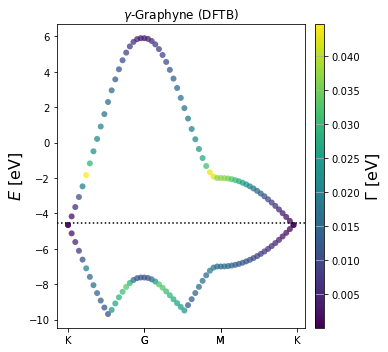

In [9]:
nb0 = 3 # start with this band
nb1 = 5 # end with this band-1

fig = plt.figure(figsize=(5.5,5))
ax1 = fig.add_subplot(1, 1, 1)

cf = ax1.scatter(np.tile(np.arange(energies.shape[0]), (nb1-nb0,1)).T, energies[:,nb0:nb1], c=lwidths[:,nb0:nb1],
                 marker='o', linewidth=0, alpha=0.75, zorder=2)    

ax1.set_xticks(indices)
ax1.set_xticklabels(labels)
ax1.set_title(r'Graphene (DFTB)')
ax1.set_ylabel(r'$E$ [eV]', fontsize=16)

plt.axhline(y=mu, color='black', linestyle=':')

# colorbar
divider = make_axes_locatable(ax1)
cax = divider.new_horizontal(size="4%", pad=0.135)
fig.add_axes(cax)
cb = fig.colorbar(cf, cax=cax, orientation="vertical")
cb.set_alpha(1)
cb.draw_all()
cb.set_label(r'$\Gamma$ [eV]', fontsize=16)
plt.tight_layout()
plt.grid()
plt.show()
# plt.savefig('Graphyne/el-ph5x5/path_el_linewidths.pdf')